## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Student Name : Budhil Chakma
### Student ID : 47554266

In [317]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [318]:
cleaned_dataset = 'cleaned_ecommerce_dataset.csv'

In [319]:
#reading the dataset

dataset_read = pd.read_csv(cleaned_dataset)   

In [320]:
print(len(dataset_read));

2685


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [321]:
dataset_read.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4


In [322]:
dataset_read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


In [323]:
dataset_read.shape[0]

2685

In [324]:
dataset_read.shape[1]

11

In [325]:
dataset_read.columns

Index(['userId', 'timestamp', 'review', 'item', 'rating', 'helpfulness',
       'gender', 'category', 'item_id', 'item_price', 'user_city'],
      dtype='object')

In [326]:
#converting categorical features into numerial version

datasetNumeric = OrdinalEncoder()
dataset_read["review_num"]= datasetNumeric.fit_transform(dataset_read[["review"]])
dataset_read["category_num"]= datasetNumeric.fit_transform(dataset_read[["category"]])
dataset_read["gender_num"]= datasetNumeric.fit_transform(dataset_read[["gender"]])
dataset_read["item_num"]= datasetNumeric.fit_transform(dataset_read[["item"]])

In [327]:
dataset_read.corr()

C:\Users\Budhil\AppData\Local\Temp\ipykernel_17532\4164624592.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset_read.corr()


,userId,timestamp,rating,helpfulness,item_id,item_price,user_city,review_num,category_num,gender_num,item_num
userId,1.000000,-0.069176,0.032506,-0.166136,-0.005549,0.024576,-0.030031,0.007139,-0.041362,-0.058324,-0.005513
timestamp,-0.069176,1.000000,0.000369,0.014179,-0.004452,0.010979,-0.014934,0.007029,0.015009,-0.003367,-0.003543
rating,0.032506,0.000369,1.000000,-0.007523,0.042890,0.027374,-0.028825,-0.036118,-0.163158,-0.034337,0.043388
helpfulness,-0.166136,0.014179,-0.007523,1.000000,-0.019882,0.004112,0.012086,-0.028259,-0.013408,0.075947,-0.020433
item_id,-0.005549,-0.004452,0.042890,-0.019882,1.000000,-0.054450,-0.005576,0.163544,-0.045268,0.002370,0.999765
item_price,0.024576,0.010979,0.027374,0.004112,-0.054450,1.000000,-0.023427,-0.041421,-0.115571,-0.040596,-0.049885
user_city,-0.030031,-0.014934,-0.028825,0.012086,-0.005576,-0.023427,1.000000,0.045626,0.008017,-0.065638,-0.005220
review_num,0.007139,0.007029,-0.036118,-0.028259,0.163544,-0.041421,0.045626,1.000000,0.001970,-0.037884,0.163090
category_num,-0.041362,0.015009,-0.163158,-0.013408,-0.045268,-0.115571,0.008017,0.001970,1.000000,0.022549,-0.045988
gender_num,-0.058324,-0.003367,-0.034337,0.075947,0.002370,-0.040596,-0.065638,-0.037884,0.022549,1.000000,0.001925


In [328]:
#calculating the correlations between helpfulness/gender/category/review and rating by using the corr() method.

helpfulness_rating_corr =abs(dataset_read['helpfulness'].corr(dataset_read['rating']))
gender_rating_corr =abs(dataset_read['gender_num'].corr(dataset_read['rating']))
category_rating_corr =abs(dataset_read['category_num'].corr(dataset_read['rating']))
review_rating_corr =abs(dataset_read['review_num'].corr(dataset_read['rating']))

In [329]:
print("Correlation between helpfulness and rating :", helpfulness_rating_corr)
print("Correlation between gender and rating :", gender_rating_corr)
print("Correlation between category and rating :", category_rating_corr)
print("Correlation between review and rating :", review_rating_corr)

Correlation between helpfulness and rating : 0.007523337726844622
Correlation between gender and rating : 0.03433661424208281
Correlation between category and rating : 0.16315765340915653
Correlation between review and rating : 0.03611838655212241


### Helpfulness and Rating 
The correlation coefficient between helpfulness and rating is close to 0. Which means there is very little linear relationship between these two columns. This means the helpfulness value does not significantly influence the ratings.

### Gender and Rating 
The gender and rating do not have a strong correlation. It is worth to mention that the gender is numerically encoded, which means there might be a slight increase in rating with numeric gender value.

### Category and Rating 
Among all the other correlation values, category and rating have the highest correlation value. which indicates a positive relationship. So the category does have an influence on product rating.

### Review and Rating
Although the correlation between rating and review is somewhat weak but it is more than the helpfulness and rating. So it can be said that reviews have some influence over product ratings.

#### Most Correlated: Category and Rating (0.1632)
#### Least Correlated: Helpfulness and Rating (0.0075)

### Overview
While correlation offers insights into the linear relationships between variables, it doesn't capture non-linear relationships, nor does it imply causation.In essence, while the direct linear correlation provides insights, it's not the sole determinant of a feature's importance. Features' collective synergy, potential non-linear relationships, and domain-specific knowledge all play a role in shaping the final prediction results in a regression model.

### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [330]:
#randomly spliting the dataset into training and testing sets for two cases

train1, test1 = train_test_split(dataset_read, train_size =0.1,random_state =142)
train2, test2 = train_test_split(dataset_read, train_size =0.9,random_state =142)

In [331]:
print(train1.shape)
print(test1.shape)

(268, 15)
(2417, 15)


In [332]:
print(train2.shape)
print(test2.shape)

(2416, 15)
(269, 15)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [333]:
#training 4 linear regression models

#model a
reg_model_a = linear_model.LinearRegression()
X_train_a = train1[['category_num', 'review_num']]
y_train_a = train1[['rating']]
reg_model_a.fit(X_train_a,y_train_a)

LinearRegression()

In [334]:
#model b
reg_model_b = linear_model.LinearRegression()
X_train_b = train1[['gender_num', 'helpfulness']]
y_train_b = train1[['rating']]
reg_model_b.fit(X_train_b,y_train_b)

LinearRegression()

In [335]:
#model c
reg_model_c = linear_model.LinearRegression()
X_train_c = train2[['category_num', 'review_num']]
y_train_c = train2[['rating']]
reg_model_c.fit(X_train_c,y_train_c)

LinearRegression()

In [336]:
#model d
reg_model_d = linear_model.LinearRegression()
X_train_d = train2[['gender_num', 'helpfulness']]
y_train_d = train2[['rating']]
reg_model_d.fit(X_train_d,y_train_d)

LinearRegression()

In [337]:
#testing the models 

#a
X_test_a = test1[['category_num', 'review_num']]
y_test_a = test1[['rating']]

In [338]:
#b
X_test_b = test1[['gender_num', 'helpfulness']]
y_test_b = test1[['rating']]

In [339]:
#c
X_test_c = test2[['category_num', 'review_num']]
y_test_c = test2[['rating']]

In [340]:
#d
X_test_d = test2[['gender_num', 'helpfulness']]
y_test_d = test2[['rating']]

# Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [341]:
# calculating and printing the results for mse and rmse for each model

#a
predicted_a = reg_model_a.predict(X_test_a)
mse_a = ((np.array(y_test_a)-predicted_a)**2).sum()/len(y_test_a)

print("MSE for Model a:", mse_a)
print("Root MSE for Model a:", np.sqrt(mse_a))


MSE for Model a: 1.7690740179517055
Root MSE for Model a: 1.3300654186737229


In [342]:
#b
predicted_b = reg_model_b.predict(X_test_b)
mse_b = ((np.array(y_test_b)-predicted_b)**2).sum()/len(y_test_b)

print("MSE for Model b:", mse_b)
print("Root MSE for Model b:", np.sqrt(mse_b))


MSE for Model b: 1.8412549895856636
Root MSE for Model b: 1.356928513071217


In [343]:
#c
predicted_c = reg_model_c.predict(X_test_c)
mse_c = ((np.array(y_test_c)-predicted_c)**2).sum()/len(y_test_c)

print("MSE for Model c:", mse_c)
print("Root MSE for Model c:", np.sqrt(mse_c))


MSE for Model c: 1.7588975359805048
Root MSE for Model c: 1.3262343442923294


In [344]:
#d
predicted_d = reg_model_d.predict(X_test_d)
mse_d = ((np.array(y_test_d)-predicted_d)**2).sum()/len(y_test_d)

print("MSE for Model d:", mse_d)
print("Root MSE for Model d:", np.sqrt(mse_d))


MSE for Model d: 1.8109460127732369
Root MSE for Model d: 1.3457139416581954


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

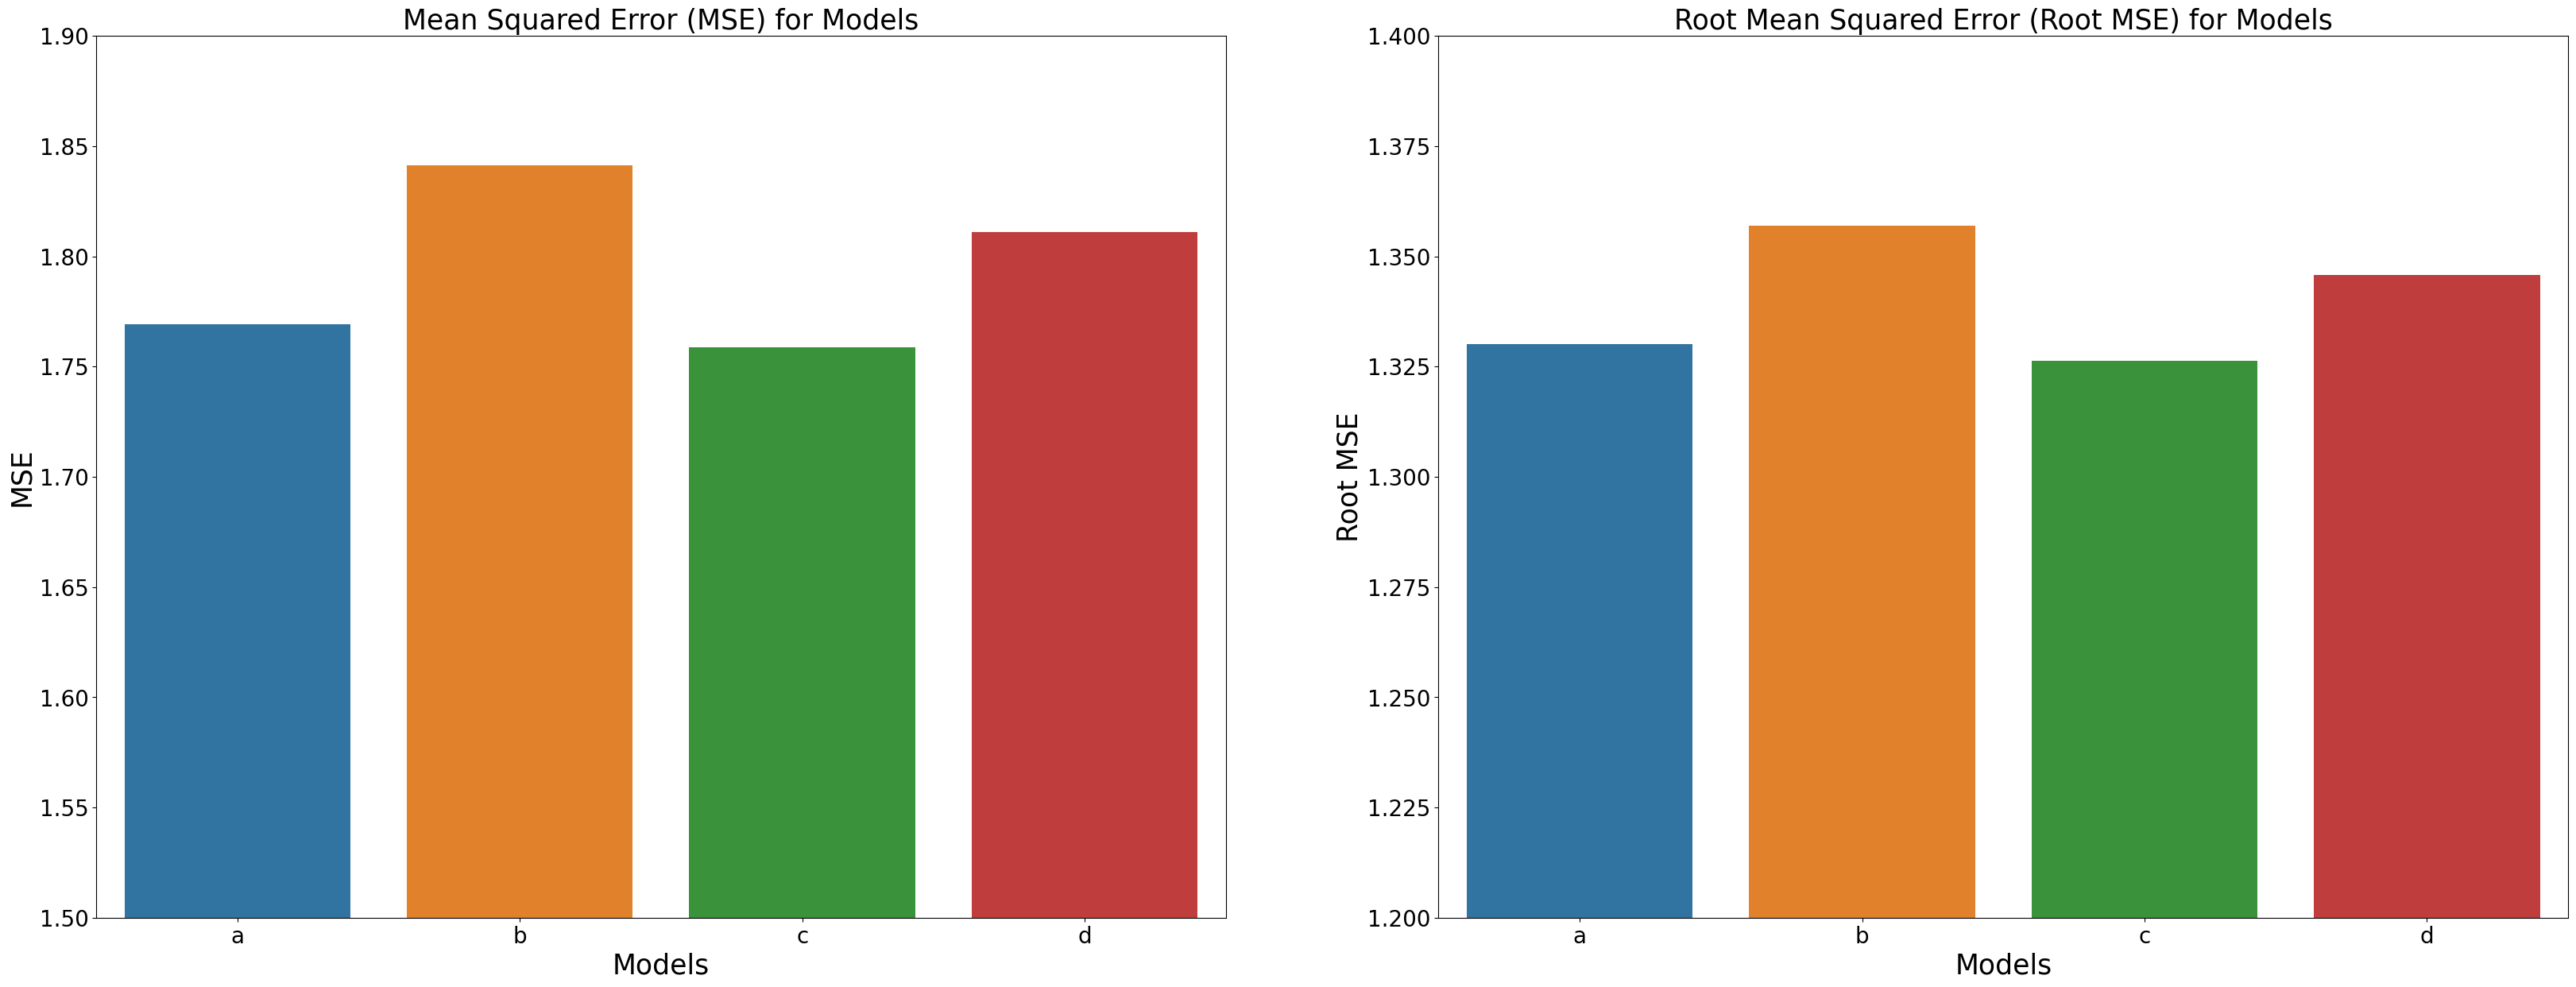

In [345]:
#visualizing the results

# Creating the dataframe
data = {
    'Models': ['a', 'b', 'c', 'd'],
    'MSE': [mse_a,mse_b,mse_c,mse_d],
    'Root MSE': [np.sqrt(mse_a),np.sqrt(mse_b),np.sqrt(mse_c),np.sqrt(mse_d)],
    
}

df = pd.DataFrame(data)

# Setting up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(35, 15))

# Plotting MSE
sns.barplot(x='Models', y='MSE', data=df, ax=ax[0])
ax[0].set_title('Mean Squared Error (MSE) for Models', fontsize = (25))
ax[0].set_ylabel('MSE', fontsize = (25))
ax[0].set_xlabel('Models', fontsize = (25))
ax[0].tick_params(axis='both', labelsize=(20))
ax[0].set_ylim([1.5, 1.9])

# Plotting Root MSE
sns.barplot(x='Models', y='Root MSE', data=df, ax=ax[1])
ax[1].set_title('Root Mean Squared Error (Root MSE) for Models', fontsize = (25))
ax[1].set_ylabel('Root MSE', fontsize = (25))
ax[1].set_xlabel('Models', fontsize = (25))
ax[1].tick_params(axis='both', labelsize=(20))
ax[1].set_ylim([1.2, 1.4])

  
plt.tight_layout(pad = 10.0)
plt.show()

## Analyzing the results of 4 models

### MSE (Mean Squared Error):

Model b has the highest MSE, which suggests that its predictions are, on average, furthest away from the actual values.</n>
Model c has the lowest MSE, which indicates that it performs slightly better than the other models in terms of average squared error.
### Root MSE (Root Mean Squared Error):

Similar to MSE, Model b has the highest Root MSE, which is not ideal. The Root MSE value represents the average error in the original units (i.e., the average error of the model's predictions).</n>
Model a and Model c have almost the same Root MSE, which is the lowest among all, indicating they are performing comparatively better.

The model c was trained with most correlated features and more training data. Compared to other models, the model c got better results. So the fact that the model trained with most correlated features and more training data gets better results, is reflected in my observations. 